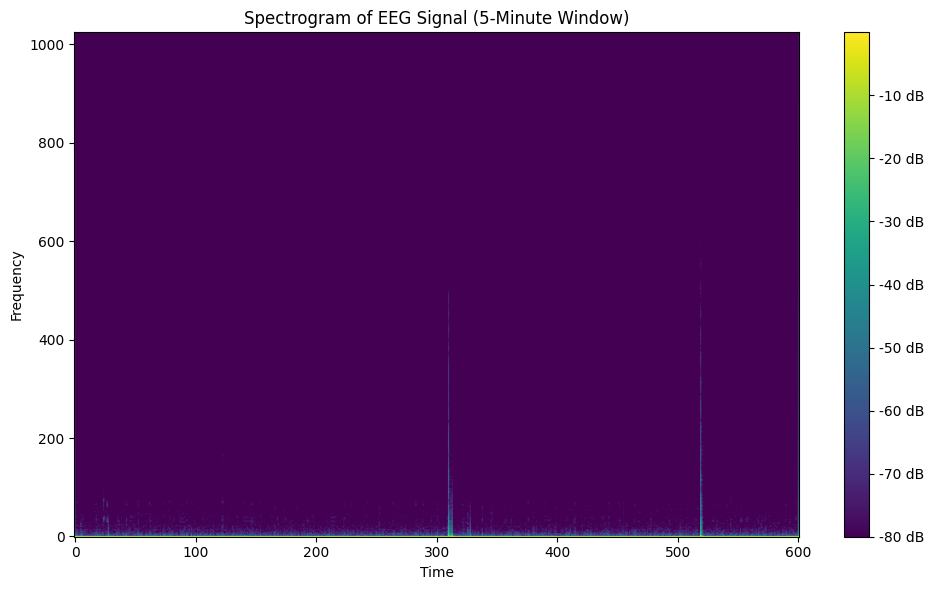

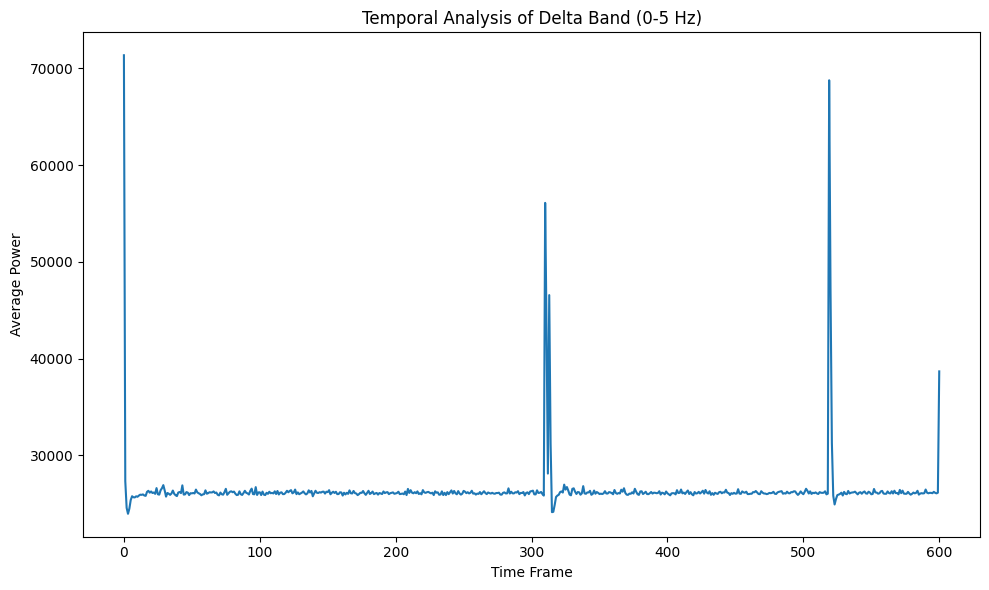

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import pi
from scipy.fftpack import fft
from scipy.io import loadmat



file = loadmat('/Volumes/Bharadwaj/physionet-official/data/0363/0363_001_006_EEG.mat')
data = file['val']
signal = np.mean(data, axis=0)

# Assuming you have the EEG signal loaded in the 'signal' variable and a known sampling rate of 100 Hz
eeg_signal = signal.astype(np.float32)  # Convert to floating-point
sampling_rate = 100

# Calculate the length of the signal in seconds and frames
signal_duration = len(eeg_signal) / sampling_rate
n_frames = int(signal_duration * sampling_rate)

n_fft = 2048
hop_length = n_fft // 2  # You can adjust this value for overlap

# Initialize an array to store spectrogram data
spectrogram_data = []

# Process the signal in chunks
for i in range(0, len(eeg_signal) - n_frames + 1, n_frames):
    chunk = eeg_signal[i:i+n_frames]
    D = np.abs(librosa.stft(chunk, n_fft=n_fft, hop_length=hop_length))
    spectrogram_data.append(D)

# Combine the spectrogram chunks into a single array
spectrogram = np.concatenate(spectrogram_data, axis=1)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.imshow(librosa.amplitude_to_db(spectrogram, ref=np.max), origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectrogram of EEG Signal (5-Minute Window)')
plt.tight_layout()
plt.show()



import numpy as np
import matplotlib.pyplot as plt
import librosa

# Load your mel-spectrogram data
# Replace 'mel_spectrogram' with your actual mel-spectrogram data
mel_spectrogram = spectrogram

# Calculate the Mel filterbank frequencies
mel_frequencies = librosa.mel_frequencies(n_mels=mel_spectrogram.shape[0], fmin=0, fmax=5)

# Find the indices corresponding to the delta band (0-5 Hz)
delta_indices = np.where((mel_frequencies >= 0) & (mel_frequencies <= 5))[0]

# Extract delta band data from the mel-spectrogram
delta_band_data = mel_spectrogram[delta_indices, :]

# Perform temporal analysis (e.g., calculate average power)
average_power = np.mean(delta_band_data, axis=0)

# Plot the temporal analysis result
plt.figure(figsize=(10, 6))
plt.plot(average_power)
plt.xlabel('Time Frame')
plt.ylabel('Average Power')
plt.title('Temporal Analysis of Delta Band (0-5 Hz)')
plt.tight_layout()
plt.show()


In [2]:
print(len(average_power))

601


In [3]:
import numpy as np

# Calculate the length of the array
array_length = len(average_power)

# Calculate the desired window size
window_size = array_length // 30

# Reshape the array into windows
data_windows = np.array_split(average_power[:window_size * 30], 30)

# Calculate the mean within each window
window_averages = np.array([window.mean() for window in data_windows])


In [4]:
print(len(window_averages))

30
